#Supervised Learning Algorithms - Logistic Regression (Univariant): 
Implement logistic regression and test it using any dataset which will be given to you. Give new test data and predict the classification output. Handcode the classification probability and compare with the model output. Print the confusion matrix, accuracy, precision, recall, sensitivity, specificity, MCC etc.  Analyze and write the inference.

In [1]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
#df.dropna(inplace=True)
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

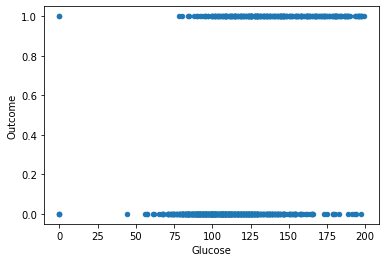

In [4]:
df.plot.scatter(x=df.columns[1],y=df.columns[8])

In [15]:
x =df.Glucose.values.reshape(-1,1)
y = df.Outcome.values.reshape(-1,1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y,test_size=0.2)

In [18]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
y_pred=reg.predict(x_test)

In [20]:
new=reg.predict([[150.0]])
print(new)

[1]


In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm=confusion_matrix(y_test,y_pred)
print(cm)
print("\n\n\n\n\n")


[[85 15]
 [30 24]]








<AxesSubplot:>

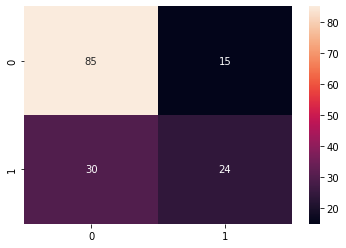

In [22]:

sns.heatmap(data=cm,annot=True)


In [23]:
from sklearn import metrics


In [24]:
print("\n Precision is", metrics.precision_score(y_test, y_pred, pos_label=1))
print("\n Recall is",metrics.recall_score(y_test, y_pred, pos_label=1))


 Precision is 0.6153846153846154

 Recall is 0.4444444444444444


In [25]:
import numpy as np
from sklearn.metrics import mean_absolute_error,  mean_squared_error
ypred_=reg.predict(x_test)
print("Mean Absolute Error = ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error = ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error = ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error =  0.2922077922077922
Mean Squared Error =  0.2922077922077922
Root Mean Squared Error =  0.5405624776173353


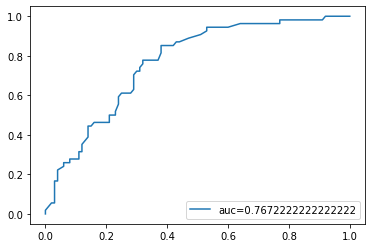

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = reg.predict_proba(x_test)[::,1]
fpr,tpr,_=roc_curve(y_test,y_pred_prob,pos_label=1)
auc = roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend()

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7077922077922078